### モジュールのインポート

In [1]:
import numpy as np
import pickle
import MeCab
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### サンプルデータの読み込み

In [2]:
with open('Sample_Data.pickle','rb') as f:
    labels,texts = pickle.load(f)

### 形態素解析の辞書，word2vecモデルの読み込み

In [3]:
#辞書
dic_path="dic/mecab-ipadic-neologd-0.0.5"
tagger = MeCab.Tagger("-Ochasen -d {0}".format(dic_path))

In [4]:
# word2vecのモデル
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('word2vec/entity_vector.model.txt')

### CNNによる学習

In [5]:
import CNN_text
CNN_classifier = CNN_text.CNN(tagger=tagger,model=model,filter_sizes=[3,4,5],n_epochs=100)

Using TensorFlow backend.


In [6]:
CNN_classifier.fit(labels=labels,texts=texts)

学習開始
EPOCH:1
 epoch 20, loss 2.95085, acc 0.2985
EPOCH:2
 epoch 40, loss 2.39998, acc 0.3315
EPOCH:3
 epoch 60, loss 2.36911, acc 0.364
EPOCH:4
 epoch 80, loss 2.39064, acc 0.3515
EPOCH:5
 epoch 100, loss 2.05889, acc 0.371
EPOCH:6
 epoch 120, loss 1.89479, acc 0.37
EPOCH:7
 epoch 140, loss 1.82439, acc 0.3765
EPOCH:8
 epoch 160, loss 1.79305, acc 0.379
EPOCH:9
 epoch 180, loss 1.6533, acc 0.374
EPOCH:10
 epoch 200, loss 1.63607, acc 0.3665
EPOCH:11
 epoch 220, loss 1.57181, acc 0.3825
EPOCH:12


KeyboardInterrupt: 

### 正解率とConfusionMatrix

正解率：0.3824999928474426


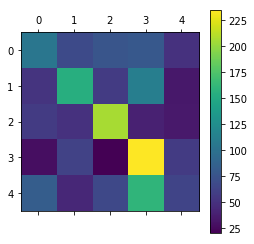

In [7]:
Results = CNN_classifier.Results

print('正解率：{}'.format(max(Results['Accuracy'].values)))
CMX = pd.DataFrame(Results.loc[Results['Accuracy'].argmax(),'confusion_matrix'])
plt.matshow(CMX)
plt.colorbar()

### 学習したモデルを用いてラベル未知のユーザの推定

In [8]:
predictions, probabilities = CNN_classifier.predict(texts=texts[:10])

INFO:tensorflow:Restoring parameters from model/Best_model.ckpt


In [9]:
predictions

array([1, 0, 0, 0, 2, 0, 0, 0, 1, 2])

In [10]:
probabilities

array([[ 0.15631659,  0.35285315,  0.09905647,  0.13462482,  0.25714895],
       [ 0.59124523,  0.04754849,  0.01627836,  0.29761395,  0.04731393],
       [ 0.59000915,  0.16162939,  0.02047419,  0.02018431,  0.20770292],
       [ 0.50225151,  0.07798162,  0.0447553 ,  0.09405971,  0.2809518 ],
       [ 0.06919045,  0.04429295,  0.79141331,  0.02433711,  0.07076616],
       [ 0.47973326,  0.05999798,  0.0712119 ,  0.08803847,  0.30101836],
       [ 0.35697156,  0.16436616,  0.17549601,  0.2148575 ,  0.08830883],
       [ 0.90643066,  0.01193968,  0.02722421,  0.00863535,  0.04577009],
       [ 0.06658294,  0.29506752,  0.24676856,  0.24845621,  0.14312477],
       [ 0.0624349 ,  0.02031473,  0.70763463,  0.1473622 ,  0.06225352]], dtype=float32)